In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# create a neural network class inheriting from the nn.Module
# Call it NeuralNetwork and make, and use "pass" in the constructor
# so that it doesn't give an error
# Instantiate one instance of it in variable net

net = 0

class NeuralNetwork(nn.Module):
    def __init__(self ):
        super(NeuralNetwork, self).__init__()
        pass

net = NeuralNetwork()

In [3]:
assert isinstance(net, NeuralNetwork)

In [4]:
# Rewrite the NeuralNetwork class so that the constructor receives
# as input the input_dim and num_hidden, respectively the dimension of 
# the input and the number of hidden neurons
# use pass again

class NeuralNetwork(nn.Module):
    pass
    def __init__(self, input_dim, num_hidden):
        super().__init__()
        pass


In [5]:
assert NeuralNetwork(input_dim=10, num_hidden=16)

In [6]:
# Rewrite the NeuralNetwork class so that the constructor receives
# as input the input_dim, num_hidden1 and num_hidden2, respectively the dimension of 
# the input and the number of hidden neurons for the first fully connected
# layer and the second. Define the attributes in the constructor
# that consists of the layers, call them fc1, fc2 and fc3 and a sigmoid.
# use pass again. Be careful to put the dimensions in the right places!
# Since we will do a binary classification problem, fc3 will have 1 neuron
# as output

class NeuralNetwork(nn.Module):
    def __init__(self, input_dim, num_hidden1, num_hidden2):
        super().__init__()
        self.fc1 = nn.Linear(input_dim, num_hidden1)
        self.fc2 = nn.Linear(num_hidden1, num_hidden2)
        self.fc3 = nn.Linear(num_hidden2, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        l1 = self.fc1(x)
        l1_activation = self.sigmoid(l1)
        l2 = self.fc2(l1_activation)
        l2_activation = self.sigmoid(l2)
        l3 = self.fc3(l2_activation)
        output = self.sigmoid(l3)
        return output
        
        

In [7]:
net = NeuralNetwork(16, 16, 16)
assert net.fc1
assert net.fc2
assert net.fc3
assert net.sigmoid

In [8]:
# Define the forward pass to make a reasonable use of the attributes
# you defined before. Follow the same reasoning we used in class


In [9]:
# For training a model, use the following optimizer and loss
'''
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
loss = nn.BCELoss()
''';

In [10]:
# train a neural network (feel free to choose the num_hidden1 and num_hidden2)
# on the dataset in data.csv file
# You'll have fun with conflicting shapes and types and tensors, but
# you'll get those errors anyway. Let's go into the wild and learn
# by reading the errors and trying to understand them! :)
# You can always use the provided Workbook

In [11]:
def torch_fit(x, y, model, loss, lr, num_epochs):
    optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
    for epoch in range(num_epochs):
        optimizer.zero_grad() # reset the weights every epoch
        y_hat = model(x)
        loss_value = loss(y_hat, y)
        print(f'Epoch {epoch}, loss {loss_value.item():.2f}')
        # plt.plot(loss_value.detach().numpy())
        loss_value.backward()
        optimizer.step()
    return model

In [12]:
dataset = pd.read_csv('./data.csv', header=None)

dataset.head()

,0,1,2
0,0.78051,-0.063669,1
1,0.28774,0.291390,1
2,0.40714,0.178780,1
3,0.29230,0.421700,1
4,0.50922,0.352560,1


In [13]:
X = torch.tensor(dataset.iloc[:, :2].values, dtype=torch.float)
y = torch.tensor(dataset.iloc[:, 2].values, dtype=torch.float)

y.size()

torch.Size([100])

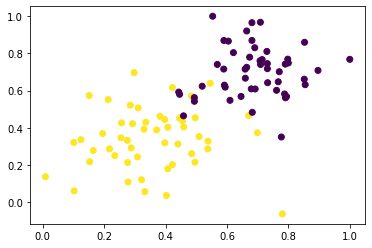

In [14]:
plt.scatter(X[:, 0], X[:, 1], c=y)

In [15]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=73)
train_rows = y_train.size()[0]
test_rows = y_test.size()[0]

In [16]:
y_train = y_train.view(train_rows, 1)
y_test = y_test.view(test_rows, 1)

In [17]:
y_train.size()

torch.Size([80, 1])

In [18]:
# training the model

model = NeuralNetwork(2, 16, 16)
# y_hat = model(x_train)
# loss_value = loss(y_pred_tensor, y_true_tensor)
# print(f"Initial loss: {loss_value.item():.2f}")
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
loss = nn.BCELoss()


In [19]:
model = torch_fit(x_train, y_train, model, loss, 0.001, 1000)


Epoch 45, loss 0.53
Epoch 46, loss 0.51
Epoch 47, loss 0.50
Epoch 48, loss 0.49
Epoch 49, loss 0.47
Epoch 50, loss 0.46
Epoch 51, loss 0.44
Epoch 52, loss 0.43
Epoch 53, loss 0.41
Epoch 54, loss 0.40
Epoch 55, loss 0.38
Epoch 56, loss 0.37
Epoch 57, loss 0.36
Epoch 58, loss 0.34
Epoch 59, loss 0.33
Epoch 60, loss 0.32
Epoch 61, loss 0.30
Epoch 62, loss 0.29
Epoch 63, loss 0.28
Epoch 64, loss 0.27
Epoch 65, loss 0.26
Epoch 66, loss 0.25
Epoch 67, loss 0.24
Epoch 68, loss 0.23
Epoch 69, loss 0.22
Epoch 70, loss 0.22
Epoch 71, loss 0.21
Epoch 72, loss 0.21
Epoch 73, loss 0.20
Epoch 74, loss 0.20
Epoch 75, loss 0.19
Epoch 76, loss 0.19
Epoch 77, loss 0.18
Epoch 78, loss 0.18
Epoch 79, loss 0.18
Epoch 80, loss 0.17
Epoch 81, loss 0.17
Epoch 82, loss 0.17
Epoch 83, loss 0.17
Epoch 84, loss 0.17
Epoch 85, loss 0.17
Epoch 86, loss 0.16
Epoch 87, loss 0.16
Epoch 88, loss 0.16
Epoch 89, loss 0.16
Epoch 90, loss 0.16
Epoch 91, loss 0.16
Epoch 92, loss 0.16
Epoch 93, loss 0.16
Epoch 94, loss 0.16


In [20]:
y_pred = model.forward(x_test) > 0.5

In [21]:
y_pred

tensor([[ True],
        [ True],
        [ True],
        [False],
        [False],
        [ True],
        [False],
        [False],
        [False],
        [ True],
        [ True],
        [ True],
        [ True],
        [False],
        [False],
        [False],
        [ True],
        [False],
        [False],
        [False]])

In [22]:
accuracy = torch.sum((y_pred == y_test).flatten())/y_pred.size()[0]

In [23]:
accuracy

tensor(0.9500)